<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/Covid_19_Maranh%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
from datetime import timedelta, date
import numpy as np


In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/jonhsel/Data-Science/master/dataset/covid19ma.csv")
df.head(-1)

,date,total
0,2020-03-18,0
1,2020-03-19,1
2,2020-03-20,1
3,2020-03-21,1
4,2020-03-22,2
...,...,...
260,2020-12-03,194320
261,2020-12-04,194800
262,2020-12-05,195020
263,2020-12-06,195086


In [62]:
df.shape

(266, 2)

In [3]:
df.dtypes

date      object
total    float64
dtype: object

In [63]:
df.date = pd.to_datetime(df.date, format='%Y/%m/%d')

In [64]:
df['total'].max()

195589

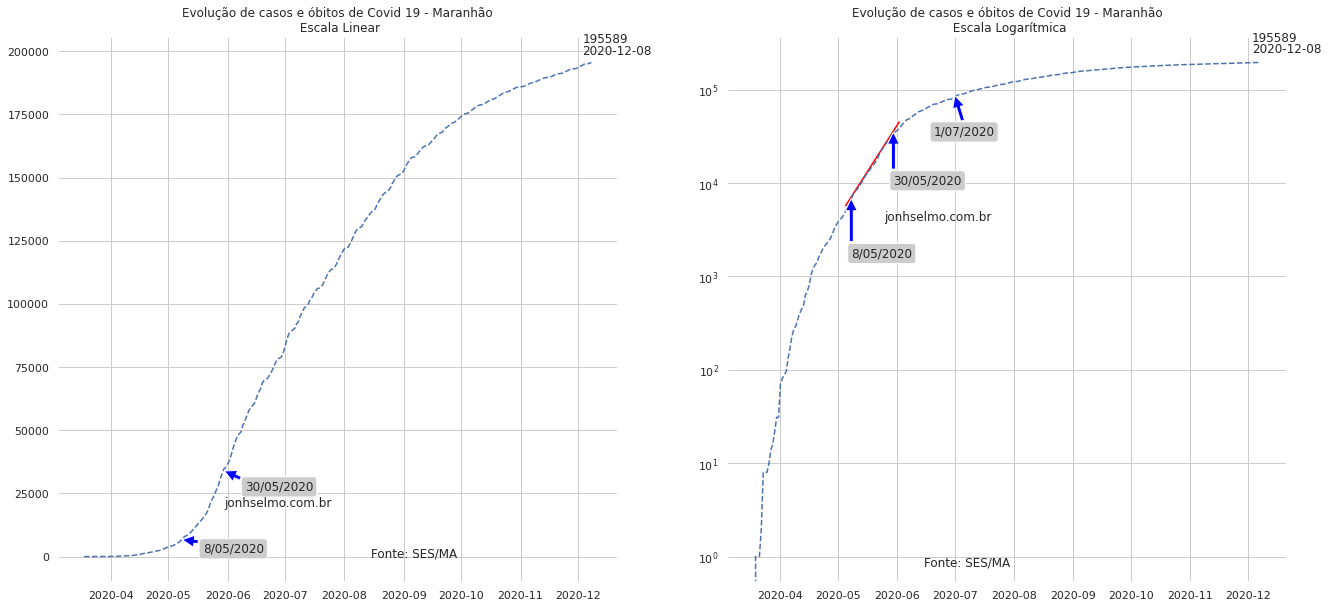

In [71]:
#criar gráfico

#Definir a última data do dataset
data_max = df['date'].max().date()



bbox_args = dict(boxstyle="round", fc="0.8")
bbox_args2 = dict(boxstyle="round", fc="0.4")

arrow_args = dict(arrowstyle="->")

#parametros de adequação para as anotações no gráfico - quantitativos
x_grafico = data_max - timedelta(10)
x = [x_grafico, data_max]

#últimos quantitativos para o total_case e total_deaths no dataset
y_tc = df['total'].max()

#configurações do gráfico
#sns.set_style='whitegrid'
sns.set(font='arial', style='whitegrid')

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(22,10))



#Gŕafico 01
ax[0].plot_date('date', 'total', 'b--', data= df)

ax[0].set_yscale('linear')
ax[0].set_title( 'Evolução de casos e óbitos de Covid 19 - Maranhão\n Escala Linear')
#ax[0].legend()

#data da análise e seta
ax[0].annotate('30/05/2020', xy=(dt.datetime(2020,5 , 30), 3.4e4), xytext=(dt.datetime(2020,6, 10), 2.5e4),
           va = 'bottom', bbox =bbox_args, arrowprops=dict(facecolor='blue' ,shrink=0.025))

ax[0].annotate('8/05/2020', xy=(dt.datetime(2020,5 , 8), 6.7e3), xytext=(dt.datetime(2020,5, 19), 500),
           va = 'bottom', bbox =bbox_args, arrowprops=dict(facecolor='blue' ,shrink=0.025))


#total_cases
ax[0].annotate(y_tc, (mdates.date2num(x[0]), y_tc+4e3),  
            xytext=(10,10), textcoords='offset points')

ax[0].annotate(str(x[1]), (mdates.date2num(x[0]), y_tc-1e3),  
            xytext=(10,10), textcoords='offset points')

#logo
ax[0].text( dt.datetime(2020,5 , 30), 2e4, 'jonhselmo.com.br')

#fonte
ax[0].text( dt.datetime(2020,8 , 15), 0.8, 'Fonte: SES/MA')


ax[0].grid(True)




#Gŕafico 02
#linha comparativa                                  ============================================
ax[1].plot((dt.datetime(2020,5,5), dt.datetime(2020,6,2)), (5.7e3, 4.5e4), color='red' )

#grafico
ax[1].plot_date('date', 'total', 'b--', data= df)
ax[1].set_yscale('log')
ax[1].set_title( 'Evolução de casos e óbitos de Covid 19 - Maranhão\n Escala Logarítmica')

#anotação e seta                                        
ax[1].annotate('30/05/2020', xy=(dt.datetime(2020,5 , 30), 3.6e4), xytext=(dt.datetime(2020,5 , 30), 9e3),
           va = 'bottom', bbox =bbox_args, arrowprops=dict(facecolor='blue', shrink=0.025))

ax[1].annotate('8/05/2020', xy=(dt.datetime(2020,5 , 8), 7e3), xytext=(dt.datetime(2020,5, 8), 1.5e3),
           va = 'bottom', bbox =bbox_args, arrowprops=dict(facecolor='blue' ,shrink=0.025))

ax[1].annotate('1/07/2020', xy=(dt.datetime(2020,7 , 1), 8.8e4), xytext=(dt.datetime(2020,6, 20), 3e4),
           va = 'bottom', bbox =bbox_args, arrowprops=dict(facecolor='blue' ,shrink=0.025))

#logo
ax[1].text( dt.datetime(2020,5 , 25), 4e3, 'jonhselmo.com.br')

#fonte

ax[1].text( dt.datetime(2020,6 , 15), 0.8, 'Fonte: SES/MA')


#ax[1].annotate('Aumento do nº de óbitos\n  06/03/2020', xy=(dt.datetime(2020,3 , 6), 3.4e3), xytext=(dt.datetime(2020,3 , 13), 4e2),
#            arrowprops=dict(facecolor='red', shrink=0.025))
#total_cases
ax[1].annotate(y_tc,  (mdates.date2num(x[0]), y_tc+6e4),  
            xytext=(10,10), textcoords='offset points')

ax[1].annotate(str(x[1]), (mdates.date2num(x[0]), y_tc),  
            xytext=(10,10), textcoords='offset points')

#total_deaths

ax[1].grid(True)


#retira os eixos da grade que cirunda o gráfico
sns.despine(left=True, bottom=True)

plt.show()
fig.autofmt_xdate()
fig.savefig('covidMA.png', format='png', dpi=400)

In [7]:
df.loc[df.date == '2020-5-30',['total']]

,total
73,34639.0


In [8]:
df.loc[df.total < 10000,['date', 'total']].sort_values(by='total', ascending=False)

,date,total
56,2020-05-13,9801.0
55,2020-05-12,9112.0
54,2020-05-11,8526.0
53,2020-05-10,8144.0
52,2020-05-09,7599.0
51,2020-05-08,6765.0
50,2020-05-07,5909.0
49,2020-05-06,5389.0
48,2020-05-05,5028.0
47,2020-05-04,4530.0
